### DS4400: Lab 06: Polynomial Curve Fitting

In [14]:
# Suppose y = mx + b + e
# That is, y responds linear with respect to x with some error

import pandas as pd
import numpy as np
#import random as rnd
import matplotlib.pyplot as plt
from sklearn import linear_model as lm


In [15]:
rnd = np.random.default_rng()

x1 = np.arange(0,10,.1)
y = 10 + 3*x1 + rnd.normal(0, 5, len(x1))
table = pd.DataFrame({'x1':x1, 'y':y})
table

,x1,y
0,0.0,7.627959
1,0.1,22.384100
2,0.2,9.072265
3,0.3,11.538215
4,0.4,17.853414
...,...,...
95,9.5,31.652389
96,9.6,37.842962
97,9.7,41.836041
98,9.8,37.630173


In [16]:
# We'll use scikit learn to find a best fit
# Let's write a convenient reusable function


def linreg(X, y):
    regr = lm.LinearRegression()
    regr.fit(X, y)
    return [regr.intercept_] + list(regr.coef_)

b, m = linreg(table[['x1']],table.y)

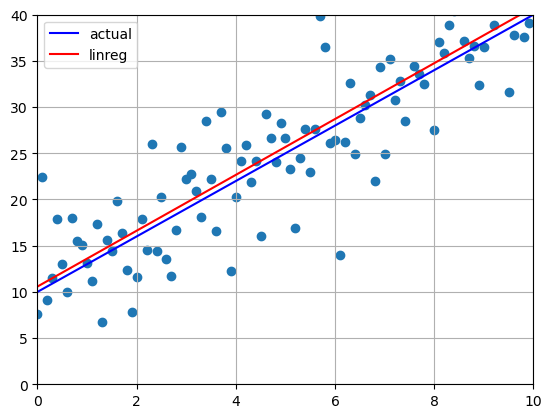

In [17]:
plt.scatter(table.x1,table.y)
plt.xlim(0, 10)
plt.ylim(0, 40)
plt.plot([0, 10], [10,40], color='blue', label='actual')
plt.plot([0, 10], [b, b + m * 10], color='red', label='linreg')
plt.legend()
plt.grid()


In [18]:
# Let's make our response depend on a second attribute
# Again introducing some noise
# This time we'll generate 100 random points
# From the x1 X x2 plane
n = 100

x1 = rnd.uniform(0, 10, 100)
x2 = rnd.uniform(0, 10, 100)

B0, B1, B2 = 10, 3, -2

y = B0 + B1 * x1 + B2 * x2 + rnd.normal(0, 10, n)

table = pd.DataFrame({'x1':x1, 'x2':x2, 'y': y})
table

,x1,x2,y
0,8.195190,0.347283,34.766822
1,5.214441,5.999541,7.197467
2,9.071968,0.842792,38.389956
3,2.546989,5.683539,8.166520
4,2.897392,5.128519,3.528246
...,...,...,...
95,5.505726,3.797384,8.357705
96,9.311576,0.826395,25.530194
97,6.542045,4.409429,11.446220
98,2.086508,9.978089,-16.604484


In [19]:
# How well does scikit's linear regression do? Pretty good
b0, b1, b2 = linreg(table[['x1', 'x2']], table.y)
print(b0, b1, b2)

12.676031264864495 2.348479501642254 -1.9303203892961034


In [20]:
import plotly.graph_objects as go
import plotly.express as px

X1, X2 = np.meshgrid(x1, x2)
Yact = B0 + B1*X1 + B2*X2
Ypred = b0 + b1*X1 + b2*X2


# plot the surface plot with plotly's Surface
fig1 = go.Figure(data=go.Surface(z=Yact, x=x1, y=x2))
fig2 = go.Figure(data=go.Surface(z=Ypred, x=x1, y=x2))

fig3 = px.scatter_3d(table,  z='y', x='x1', y='x2')
fig3.update_traces(marker_size = 3)


fig = go.Figure(data = fig1.data + fig2.data + fig3.data)

fig.update_layout(
    autosize = False,
    width=1000, height=1000
)

fig.show()


In [8]:

# Suppose we are fitting data to a polynomial???

x = np.arange(-10,10, 1)
y_act = 10 - 5*x - 4 * x**2 + .5 * x**3 
y = y_act + rnd.normal(0, 100, len(x))


table = pd.DataFrame({'x1':x, 'x2': x**2, 'x3':x**3, 'x4':x**4, 'x5':x**5, 'x6':x**6, 'x7':x**7, 'x8':x**8, 'y':y})
table






,x1,x2,x3,x4,x5,x6,x7,x8,y
0,-10,100,-1000,10000,-100000,1000000,-10000000,100000000,-848.229501
1,-9,81,-729,6561,-59049,531441,-4782969,43046721,-793.784342
2,-8,64,-512,4096,-32768,262144,-2097152,16777216,-361.437473
3,-7,49,-343,2401,-16807,117649,-823543,5764801,-319.903757
4,-6,36,-216,1296,-7776,46656,-279936,1679616,-211.864226
5,-5,25,-125,625,-3125,15625,-78125,390625,-309.493382
6,-4,16,-64,256,-1024,4096,-16384,65536,-53.667404
7,-3,9,-27,81,-243,729,-2187,6561,-38.938698
8,-2,4,-8,16,-32,64,-128,256,10.474336
9,-1,1,-1,1,-1,1,-1,1,58.476852


In [9]:

X = table[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']]
y = table.y
B = linreg(X,y)
b0, b1, b2, b3, b4, b5, b6, b7, b8   = B
print(B)

y_pred = b0 + b1 * x + b2 * x**2 + b3 * x**3 + b4 * x**4 + b5 * x**5 + b6 * x**6 + b7 * x**7 + b8 * x**8

[29.604809612609387, -21.922925923887007, -19.15523873753225, 1.9342190230188192, 0.8079206656840263, -0.03291634168293148, -0.013751543293422763, 0.00023247156581529538, 7.438028656636675e-05]


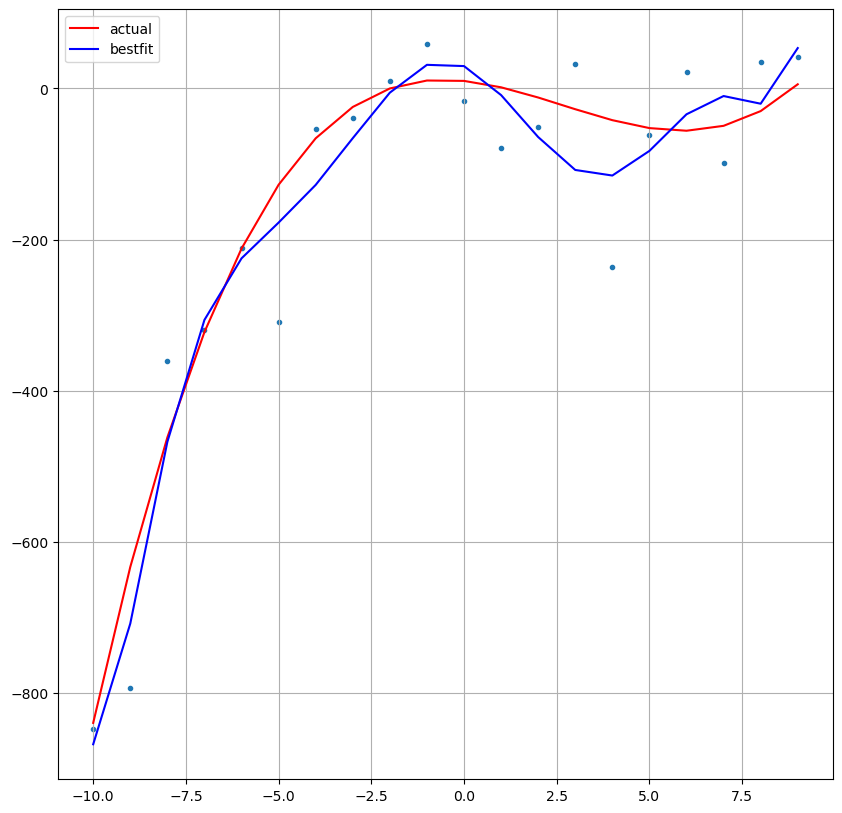

In [10]:

# Now plot

plt.figure(figsize=(10,10))
plt.scatter(x,y, marker='.')
plt.plot(x, y_act, color='red', label='actual')
plt.plot(x, y_pred, color='blue', label='bestfit')
plt.legend()
#plt.ylim(y_act.min()-50, y_act.max()+50)

plt.grid()


In [11]:
def MSE(ypred, y):
    return ((ypred - y)**2 ).mean()

In [12]:
MSE(y, y_pred)

5007.5094232381225